Google Drive Link: https://drive.google.com/drive/folders/1PHirfZEZzJXfA9sBHeCdiQVJwl8juuVF?usp=sharing

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 1. Function to generate input data matrix X 

In [2]:
# Function to generate input data matrix X of size NxD for regression given n and a generator matrix matrix S of size MxD
def generate_input_data(n, S):
    # Generate the input data matrix X of size NxD
    X = np.random.randn(n, S.shape[0]) @ S
    return X

### 2. Function to generate target vector t

In [3]:
# Function to generate target vector t of size Nx1 
# X: NxD, w: (D+1)x1, sigma: variance of noise
def generate_target_vector(X, w, sigma):
    # Check for dimension mismatch between X and w
    if X.shape[1] != w.shape[0] - 1:    # Raise Error if there is a dimension mismatch
        raise ValueError('Dimension mismatch between X and w')
    # Multiply X with w (except last element i.e. bias) and add the bias (the excluded element)
    t = X @ w[:-1] + w[-1]
    # Add zero-mean Gaussian noise with variance σ
    t += np.random.randn(X.shape[0], 1) * np.sqrt(sigma)
    return t

### 3. Function to find analytical solution of regression

In [4]:
# Analytical solution for linear regression using psuedo-inverse
def analytical_solution(X, t):
    # Add a column of ones to X for bias to vectorise the calculation
    X = np.hstack((X, np.ones((X.shape[0], 1))))    # Reference (1)
    # Calculate the weight vector w using the psuedo-inverse of X
    w = np.linalg.pinv(X) @ t   # Reference (2)
    return w

In [5]:
import time     # Import the time library to measure the time taken for the computation

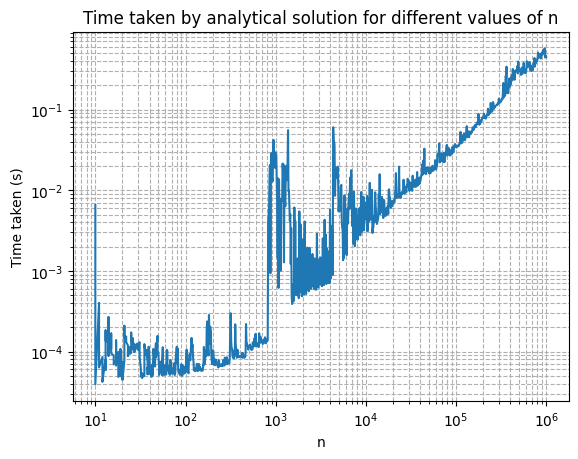

In [6]:
# Plot graph of time taken by analytical solution for different values of n
n_values = np.logspace(1, 6, num=1000, endpoint=True, base=10.0, dtype=np.int64)   # Reference (3)
times = []  # List to store the time taken for each value of n
d = 10
for n in n_values:
    S = np.eye(d)   # Initialise the generator matrix S as the identity matrix
    X = generate_input_data(n, S)  # Generate the input data matrix X
    w = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]])   # Initialise the true weight vector w
    t = generate_target_vector(X, w, 0.1)  # Generate the target vector t
    start_time = time.perf_counter()    # Reference (4)
    w = analytical_solution(X, t) # Calculate the weight vector w using the analytical solution
    end_time = time.perf_counter()
    times.append(end_time - start_time)   # Calculate the time taken for the analytical solution

# Plot the graph on a log-log scale
plt.plot(n_values, times)
plt.xlabel('n')
plt.ylabel('Time taken (s)')
plt.xscale('log')   # Set x-axis to log scale
plt.yscale('log')   # Set y-axis to log scale
plt.grid(True, which="both", ls="--")
plt.title('Time taken by analytical solution for different values of n')
plt.show()

Few things which can be seen from the plot:
- The time for solving initally decreases as n increases until n reaches a value around 20-50. After this it again increases. This could be due to cache optimisation techniques or other such reasons related to computer architecture.
- The time then again rises almost linearly until n = 1000 where there's a sudden jump which could again be due to optimisations carried out by the processor to carry out the calculations
- The overall slope of the log scale is close to 1 which means the time taken is linearly related to size of vector (n)

### 4. Function to calculate NRMSE between target vector t and predicted vector y

In [7]:
# Find NRMSE between predicted variable y and target variable t
def NRMSE(y, t):
    # Calculate the root mean squared error
    RMSE = np.sqrt(np.mean((y - t) ** 2))
    std_dev_y = np.std(y)   # Calculate the standard deviation of y
    # Calculate the normalised root mean squared error
    NRMSE = RMSE / std_dev_y    # Reference (5)
    return NRMSE

# Function to generate the predicted variable y given the input data matrix X and weight vector w
def generate_predicted_variable(X, w):
    # Generate the predicted variable y
    y = X @ w[:-1] + w[-1]
    return y

### 5. Function to calulate gradient of MSE
### 6. Function to calculate gradient of L2 norm
### 7. Function to calculate gradient of L1 norm 

In [8]:
# Function to calculate gradient of MSE wrt weights of linear regression model
def gradient_of_MSE(X, t, w):
    # Add a column of ones to X to account for bias term
    X = np.hstack((X, np.ones((X.shape[0], 1)))) 
    # Calculate the gradient of MSE wrt weights of linear regression model   
    gradient = 2 * X.T @ (X @ w - t) / X.shape[0]
    return gradient

# Function to calculate gradient of L2 norm of weights
def gradient_of_L2_norm(w):
    # Calculate the gradient of L2 norm of weights
    gradient = 2 * w
    return gradient

# Function to calculate gradient of L1 norm of weights
def gradient_of_L1_norm(w):
    # Calculate the gradient of L1 norm of weights
    gradient = np.sign(w)
    return gradient

### 8. Function to perform gradient descent on MSE + $\lambda_1*L1$ + $\lambda_2*L2$

Stopping criterion used:- Number of iterations

In [9]:
# Function to perform gradient descent for linear regression
def gradient_descent(X, t, w, learning_rate, num_iterations, lambda_1, lambda_2):
    # Initialise list to store the loss at each iteration
    loss = []
    # Perform gradient descent for the specified number of iterations
    for i in range(num_iterations):
        # Calculate the predicted variable y
        y = generate_predicted_variable(X, w)
        # Calculate the mean squared error
        mse = np.mean((y - t) ** 2)
        # Append the loss to the list
        loss.append(mse)
        # Calculate the gradient of MSE wrt weights of linear regression model
        gradient = gradient_of_MSE(X, t, w)
        # Add the gradient of L1 and L2 norms of weights to the gradient
        gradient += lambda_1 * gradient_of_L1_norm(w)   
        gradient += lambda_2 * gradient_of_L2_norm(w)
        # Update the weights using the learning rate and gradient
        w -= learning_rate * gradient
    return w, loss

### 9. Impact of sigma on NRMSE 

$\sigma$ is ranging from $10^{-2}$ to $10^2$  

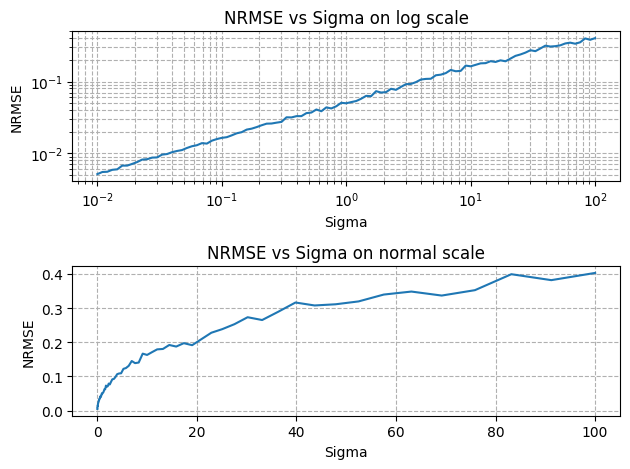

In [10]:
# Generate input data matrix X of size NxD for regression and target vector t of size Nx1
n = 1000    # Number of data points
d = 10      # Number of features
S = np.eye(d) # Given as G in the question
w = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]])     # True weight vector

# Create list for different values of sigma
sigmas = np.logspace(-2, 2, num=101, endpoint=True, base=10.0, dtype=None)
# Initialise list for NRMSE values for each sigma
NRMSE_list = []
for sigma in sigmas:
    # Make list for NRMSE values for each iteration
    NRMSE_values = []
    for i in range(5):
        X = generate_input_data(n, S) # Generate input data matrix X
        t = generate_target_vector(X, w, sigma) # Generate target vector t

        # Split data into training and validation sets
        train_split = 0.8   # 80% of data is used for training
        train_size = int(train_split * n)  # Calculate the size of training set

        X_train = X[:train_size]    # Training set
        t_train = t[:train_size]    # Training set
        X_val = X[train_size:]      # Validation set
        t_val = t[train_size:]      # Validation set

        # Perform gradient descent 
        w = np.random.randn(d + 1, 1)  # Initialise the weight vector w
        # Hyperparameters
        learning_rate = 0.01        # Learning rate
        num_iterations = 1000       # Number of iterations
        lambda_1 = 0                # L1 regularisation parameter
        lambda_2 = 0                # L2 regularisation parameter
        # Perform gradient descent
        w, loss = gradient_descent(X_train, t_train, w, learning_rate, num_iterations, lambda_1, lambda_2)

        # Generate the predicted variable y for validation set
        y_val = generate_predicted_variable(X_val, w)
        # Find NRMSE between predicted variable y and t for validation set
        nrmse = NRMSE(y_val, t_val)
        # Append the NRMSE to the list
        NRMSE_values.append(nrmse)

    # Find average NRMSE for each sigma
    avg_NRMSE = np.mean(NRMSE_values)
    # Append the average NRMSE to the list
    NRMSE_list.append(avg_NRMSE)

# Plot the graph of NRMSE vs sigma on subplots for log and normal scale
fig, axs = plt.subplots(2)   # Reference (6)
axs[0].plot(sigmas, NRMSE_list)
axs[0].set_xscale('log')   # Set x-axis and y-axis to log scale
axs[0].set_yscale('log')
axs[0].set_xlabel('Sigma')
axs[0].set_ylabel('NRMSE')
axs[0].grid(True, which="both", ls="--")
axs[0].set_title('NRMSE vs Sigma on log scale')
axs[1].plot(sigmas, NRMSE_list)
axs[1].set_xlabel('Sigma')
axs[1].set_ylabel('NRMSE')
axs[1].grid(True, which="both", ls="--")
axs[1].set_title('NRMSE vs Sigma on normal scale')
plt.tight_layout()
plt.show()

As we can see the NRMSE rises with a slope of 0.5 in log scale which means NRMSE is directly proportional to $\sqrt{\sigma}$. This makes sense because the noise is directly proportional to the standard deviation of noise. The standard deviation of noise is $\sqrt{\sigma}$ as the variance is given to be $\sigma$. 

### 10. Examination of impact of N and $\lambda_2$ on NRMSE

In [11]:
# N list for different values of n
n_values = np.logspace(1, 4, num=5, endpoint=True, base=10.0, dtype=np.int64)   

# lambda_2 list for different values of lambda_2
lambda_2_values = np.logspace(-5, 2, num=10, endpoint=True, base=10.0, dtype=None)

# Initialise list for NRMSE values for each lambda_2 versus n
NRMSE_values = [[] for _ in range(len(lambda_2_values))]   # Reference (7)


for n in n_values:
    for i, lambda_2 in enumerate(lambda_2_values):
        average = 0
        for j in range(5):    
            # Generate input data matrix X of size NxD for regression and target vector t of size Nx1
            d = 10     # Number of features
            S = np.eye(d) # Given as G in the question
            X = generate_input_data(n, S) # Generate input data matrix X
            w = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]])    # True weight vector
            t = generate_target_vector(X, w, 0.1) # Generate target vector t

            # Split data into training and validation sets
            train_split = 0.8  # 80% of data is used for training
            train_size = int(train_split * n) # Calculate the size of training set

            X_train = X[:train_size]    # Training set
            t_train = t[:train_size]    # Training set
            X_val = X[train_size:]      # Validation set
            t_val = t[train_size:]      # Validation set

            # Perform gradient descent
            w = np.random.randn(d + 1, 1) # Initialise the weight vector w
            # Hyperparameters
            learning_rate = 0.01    # Learning rate
            num_iterations = 1000   # Number of iterations
            lambda_1 = 0            # L1 regularisation parameter

            w, loss = gradient_descent(X_train, t_train, w, learning_rate, num_iterations, lambda_1, lambda_2) # Perform gradient descent

            # Generate the predicted variable y for validation set
            y_val = generate_predicted_variable(X_val, w) 
            nrmse = NRMSE(y_val, t_val) # Find NRMSE between predicted variable y and t for validation set
            average += nrmse   # Add the NRMS to the average
        nrmse = average / 5   # Calculate the average NRMSE
        NRMSE_values[i].append(nrmse)  # Append the NRMSE to the list

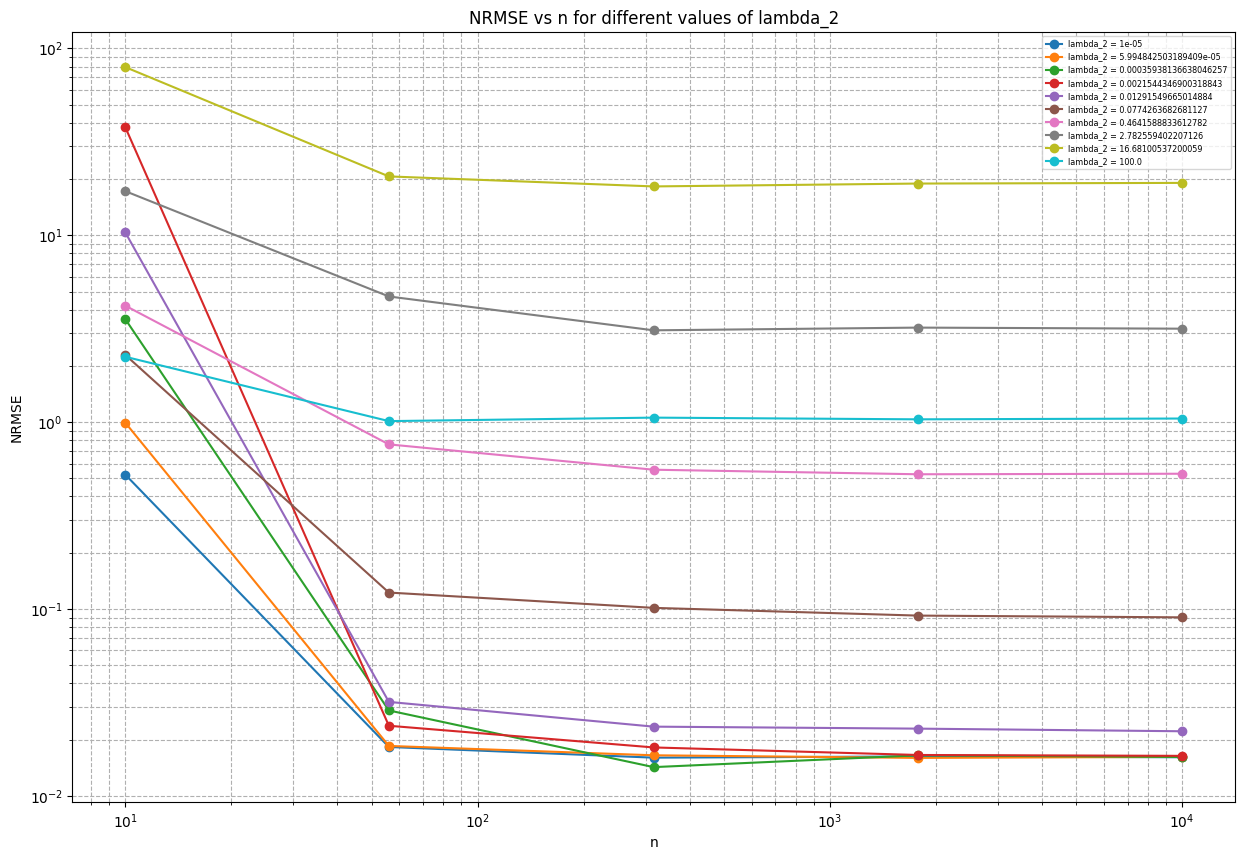

In [12]:
# Plot the graph of NRMSE vs n for different values of lambda_2
plt.figure(figsize=(15, 10))
for i, lambda_2 in enumerate(lambda_2_values): # Enumerate over lambda_2 values
    plt.plot(n_values, NRMSE_values[i], marker='o', label=f'lambda_2 = {lambda_2}') # Plot the graph for each lambda_2 value
plt.xlabel('n')
plt.ylabel('NRMSE')
plt.xscale('log')  # Set x-axis and y-axis to log scale
plt.yscale('log')
plt.grid(True, which="both", ls="--") # Add grid lines
plt.legend(fontsize='xx-small') # Add legend and setting font size to small to fit all values
plt.title('NRMSE vs n for different values of lambda_2') # Set title of the graph
plt.show()

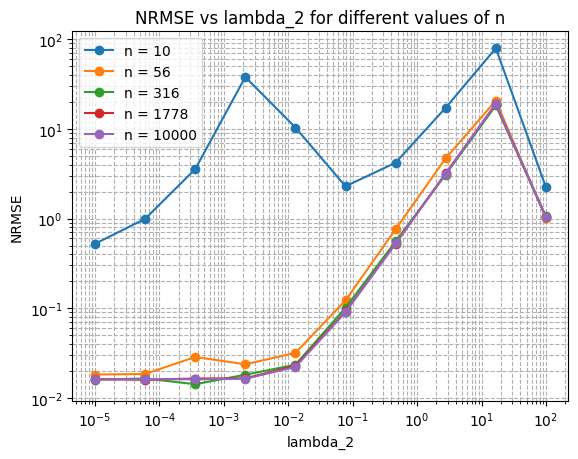

In [13]:
# Plot the graph for NRMSE vs lambda_2 for different values of n
# Take the transpose of NRMSE_values to get the correct shape
NRMSE_values_T = np.array(NRMSE_values).T
for i, n in enumerate(n_values):   # Enumerate over n values
    plt.plot(lambda_2_values, NRMSE_values_T[i], marker='o', label=f'n = {n}') # Plot the graph for each n value
plt.xlabel('lambda_2')
plt.ylabel('NRMSE')
plt.xscale('log')  # Set x-axis and y-axis to log scale
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('NRMSE vs lambda_2 for different values of n')
plt.show()


As we can see, the plot for n = 10 is significantly higher than the other values of n. For n = 10, the training set size is just 8 samples and hence it leads to a high variance model due to overfitting and hence a high NRMSE on the validation set. Also due to this, the plot seems very random for the n = 10 case. All other plots follow a similar trend to each other with a peak around lambda = 10 after which NRMSE again decreases.

### 11. Examination of impact of $\lambda_1$ on the weights

In [14]:
n = 1000    # Number of data points
d = 10      # Number of features
S = np.eye(d)  # S = Identity to produce X without correlation
X = generate_input_data(n, S) # Generate the input data matrix X
w = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]) # True weight vector
t = generate_target_vector(X, w, 0.1) # Generate the target vector t

# Split data into training and validation sets
train_split = 0.8  # 80% of data is used for training 
train_size = int(train_split * n) # Calculate the size of training set

X_train = X[:train_size]  # Training set
t_train = t[:train_size]  # Training set
X_val = X[train_size:]    # Validation set
t_val = t[train_size:]    # Validation set

# lambda_1 list for different values of lambda_1
lambda_1_inverse_values = np.logspace(-2, 2, 101, endpoint=True, base=10.0, dtype=None)

# Initialise list for weights for each lambda_1
weights = []  

for lambda_1_inv in lambda_1_inverse_values:
    # Perform gradient descent
    w = np.random.randn(d + 1, 1) # Initialise the weight vector w
    # Hyperparameters
    learning_rate = 0.01   # Learning rate
    num_iterations = 1000  # Number of iterations
    lambda_2 = 0           # L2 regularisation parameter
    # Passing 1/lambda_1_inv as lambda_1 to the gradient descent function
    w, loss = gradient_descent(X_train, t_train, w, learning_rate, num_iterations, 1/lambda_1_inv, lambda_2)
    # Append the weights to the list
    weights.append(w)

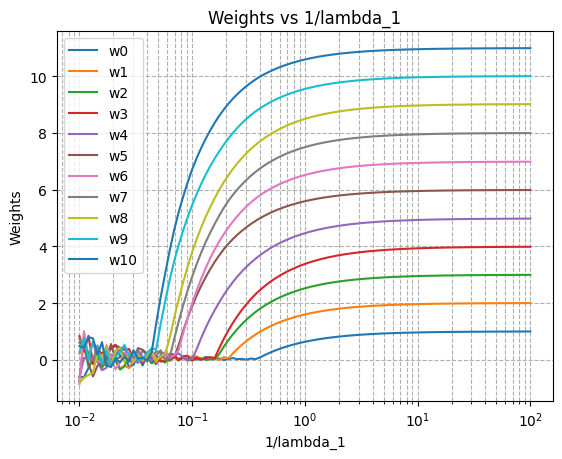

In [15]:
# Plot the graph of weights vs 1/lambda_1
weights = np.array(weights).reshape((len(lambda_1_inverse_values), d + 1)) # Reshape the weights vector
for i in range(d + 1): # Enumerate over the number of features
    plt.plot(lambda_1_inverse_values, weights[:, i], label=f'w{i}') # Plot the graph for each feature
plt.xlabel('1/lambda_1')
plt.ylabel('Weights')
plt.xscale('log') # Set x-axis to log scale
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('Weights vs 1/lambda_1')
plt.show()

As we can see here, for high values of $\frac{1}{\lambda_1}$, i.e. low values of $\lambda_1$, we have the weight values equal to the true weights and as $\lambda_1$ increases, the weights get driven to zero leading to feature elimination.

In [16]:
# Introducing correlation between features by changing S
n = 1000    # Number of data points
d = 10      # Number of features
S = np.random.randn(d, d) # Random matrix S to introduce correlation between features
X = generate_input_data(n, S) # Generate the input data matrix X 
w = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]) # True weight vector
t = generate_target_vector(X, w, 0.1) # Generate the target vector t

# Split data into training and validation sets
train_split = 0.8 # 80% of data is used for training
train_size = int(train_split * n)   # Calculate the size of training set

X_train = X[:train_size]   # Training set 
t_train = t[:train_size]   # Training set
X_val = X[train_size:]     # Validation set
t_val = t[train_size:]     # Validation set

# lambda_1 list for different values of lambda_1
lambda_1_inverse_values = np.logspace(-2, 2, 101, endpoint=True, base=10.0, dtype=None)

# Initialise list for weights for each lambda_1
weights = []

for lambda_1_inv in lambda_1_inverse_values:
    # Perform gradient descent
    w = np.random.randn(d + 1, 1) # Initialise the weight vector w
    # Hyperparameters
    learning_rate = 0.01  # Learning rate
    num_iterations = 1000 # Number of iterations
    lambda_2 = 0          # L2 regularisation parameter
    # Passing 1/lambda_1_inv as lambda_1 to the gradient descent function
    w, loss = gradient_descent(X_train, t_train, w, learning_rate, num_iterations, 1/lambda_1_inv, lambda_2) # Perform gradient descent
    # Append the weights to the list
    weights.append(w)

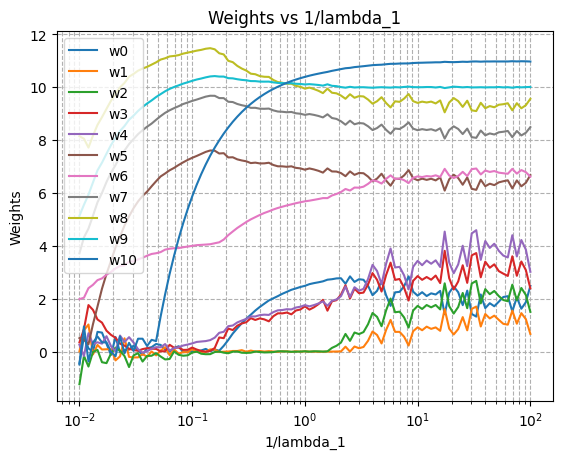

In [17]:
# Plot the graph of weights vs 1/lambda_1
weights = np.array(weights).reshape((len(lambda_1_inverse_values), d + 1)) # Reshape the weights vector
for i in range(d + 1): # Enumerate over the number of features
    plt.plot(lambda_1_inverse_values, weights[:, i], label=f'w{i}') # Plot the graph for each feature
plt.xlabel('1/lambda_1')
plt.ylabel('Weights')
plt.xscale('log') # Set x-axis to log scale
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('Weights vs 1/lambda_1')
plt.show()

As we can see here, as we introduce correlation between variables, they become unstable and oscillate a lot and also don't get driven to zero even at high values of $\lambda_1$. w10 has a similar trend as the previous because it represents the bias term which is trivially un-correlated with other weights and hence is unaffected by $\lambda_1$

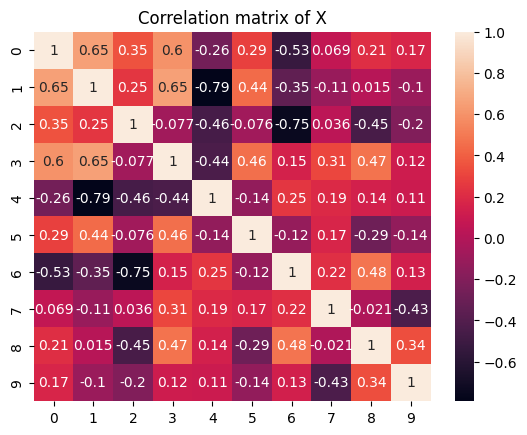

In [18]:
# Plot correlation matrix of X 
df = pd.DataFrame(X)    # Convert X to a pandas dataframe
# Calculate the correlation matrix
corr = df.corr()        # Reference (8)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix of X')
plt.show()

This heatmap shows the correlation between the columns of X. The columns which have high correlations with others tend to have more noisy weight vectors as evident from the plot

### 12. Grouping effect of Elastic Net

Actual Weights:
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


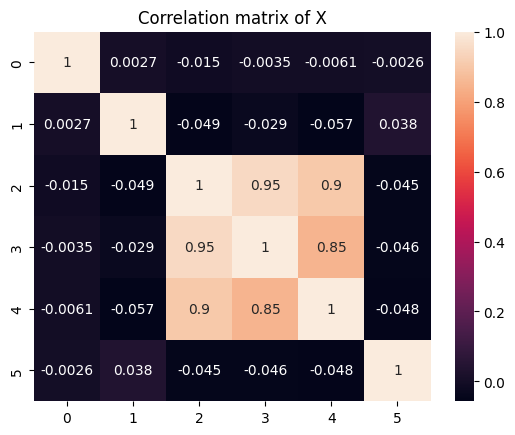

In [19]:
# Grouping effect of elastic net
n = 1000    # Number of data points
d = 6       # Number of features
S = np.array([[1, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0.7, 0.6, 0],
                [0, 0, 0.7, 1, 0.5, 0],
                [0, 0, 0.6, 0.5, 1, 0],
                [0, 0, 0, 0, 0, 1]])  # Making S a positive definite, non-identity matrix to introduce correlation between features
X = generate_input_data(n, S) # Generate the input data matrix X
w = np.array([[1], [2], [3], [4], [5], [6], [7]]) # True weight vector
print('Actual Weights:')      # Print the actual weights
print(w)
t = generate_target_vector(X, w, 0.1) # Generate the target vector t

# Plot correlation matrix of X
df = pd.DataFrame(X)
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix of X')
plt.show()

lambda_values = np.linspace(0, 5, num=1001, endpoint=True, dtype=None) # lambda values for elastic net

# Split data into training and validation sets
train_split = 0.8 # 80% of data is used for training
train_size = int(train_split * n) # Calculate the size of training set

X_train = X[:train_size] # Training set
t_train = t[:train_size] # Training set
X_val = X[train_size:]   # Validation set
t_val = t[train_size:]   # Validation set

# Initialise list for weights for each lambda_1
weights = []

for lambda_val in lambda_values:
    # Perform gradient descent
    w = np.random.randn(d + 1, 1) # Initialise the weight vector w
    # Hyperparameters
    learning_rate = 0.01 # Learning rate
    num_iterations = 1000 # Number of iterations
    # Setting lambda_2 = lambda_1 = lambda_val for elastic net 
    w, loss = gradient_descent(X_train, t_train, w, learning_rate, num_iterations, lambda_val, lambda_val) # Perform gradient descent
    # Append the weights to the list
    weights.append(w)

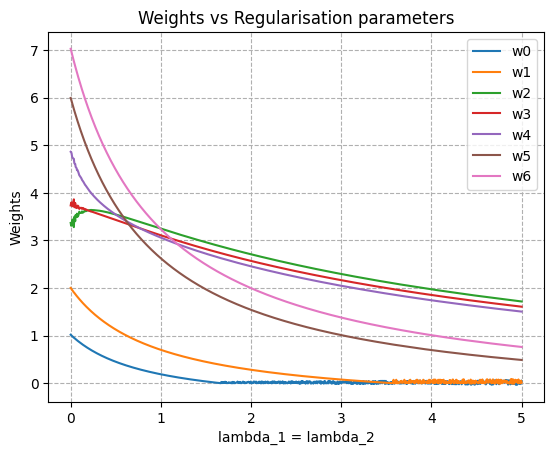

In [20]:
# Plot the graph of weights vs lambda_1
weights = np.array(weights).reshape((len(lambda_values), d + 1)) # Reshape the weights vector
for i in range(d + 1):
    plt.plot(lambda_values, weights[:, i], label=f'w{i}') # Plot the graph for each feature
plt.xlabel('lambda_1 = lambda_2')
plt.ylabel('Weights')
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('Weights vs Regularisation parameters')    
plt.show()

As we can see, the weights for correlated variables i.e. w2, w3, w4 are being driven to almost equal values. This shows the grouping effect of the Elastic Net. The un-correlated variables are driven to zero as $\lambda$ increases. The elastic net works in the following manner
- $\lambda_1$ drives weights to zero as $\lambda_1$ increases leading to feature elimination
- $\lambda_2$ provides stability by grouping correlated variables to similar weights

When we combine the two, we get stability as well as feature elimination as shown by the plot

### 13. Function for generating Linear Binary Classification Vector t

In [21]:
# Sigmoid function
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

# Function for generating linear binary classification vector t with noise variance sigma
def generate_binary_classification_target_vector(X, w, sigma):
    X = np.hstack((X, np.ones((X.shape[0], 1))))   # Add a column of ones to X for bias
    # Calculate the predicted variable y
    y = X @ w + np.random.randn(X.shape[0], 1) * np.sqrt(sigma)
    # Apply the sigmoid function to y to get the probability
    p = sigmoid(y)
    # Generate the binary classification vector t, t = 1 if p >= 0.5, else t = 0
    t = (p >= 0.5).astype(int)
    return t

### 14. Function to compute gradient of BCE for Logsitic Regression

In [22]:
# Function to compute gradient of binary cross-entropy for logistic regression

def gradient_of_binary_cross_entropy(X, t, w):
    X = np.hstack((X, np.ones((X.shape[0], 1))))  # Add a column of ones to X for bias
    # Calculate the predicted variable y
    y = X @ w
    # Apply the sigmoid function to y to get the probability
    p = sigmoid(y)
    # Calculate the gradient of binary cross-entropy
    gradient = X.T @ (p - t)
    return gradient

#### Function to carry out gradient descent for logisitic regression

In [23]:
# Function to perform gradient descent for logistic regression
def logistic_regression(X, t, w, learning_rate, lambda_1, lambda_2, num_iterations):
    # Initialise list to store the loss at each iteration
    loss = []
    # Perform gradient descent for the specified number of iterations
    for i in range(num_iterations):
        # Calculate the loss
        y = X @ w[:-1] + w[-1]  # Calculate the predicted variable y
        p = sigmoid(y)
        p = np.clip(p, 1e-10, 1 - 1e-10) # Clip the probability to avoid log(0) 
        loss.append(-np.mean(t * np.log(p) + (1 - t) * np.log(1 - p)))
        # Calculate the gradient of binary cross-entropy
        gradient = gradient_of_binary_cross_entropy(X, t, w)
        # Add the gradient of L1 and L2 norms of weights to the gradient
        gradient += lambda_1 * gradient_of_L1_norm(w)
        gradient += lambda_2 * gradient_of_L2_norm(w)
        # Update the weights using the learning rate and gradient
        w = w - (learning_rate * gradient)
    return w, loss

#### Trying out Binary Classification and Logistic Regression once before carrying out task 15

Actual Weights:
[[ 0.64983569]
 [-1.39443853]
 [ 0.64338933]]


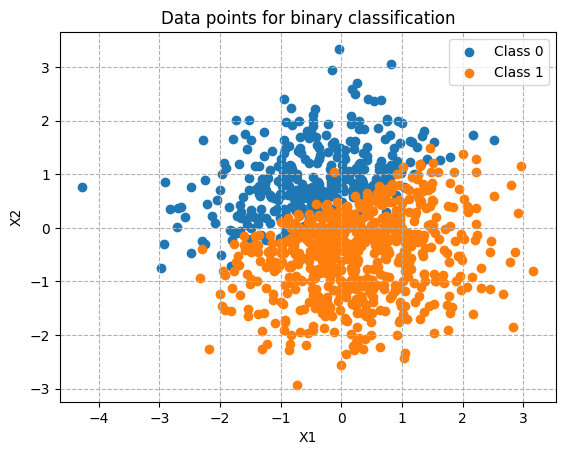

In [24]:
# Generate input data matrix X of size NxD for binary classification and target vector t of size Nx1
n = 1000    # Number of data points
d = 2       # Number of features
S = np.eye(d) # Generator matrix S
X = generate_input_data(n, S) # Generate the input data matrix X
w = np.random.randn(d + 1, 1) # Initialise the weight vector w
t = generate_binary_classification_target_vector(X, w, 0.1) # Generate the binary classification vector t

print('Actual Weights:')   # Print the true weights
print(w) 

# Plot the data points with different colours for each class
plt.scatter(X[t.flatten() == 0, 0], X[t.flatten() == 0, 1], label='Class 0') # Plot the data points for class 0
plt.scatter(X[t.flatten() == 1, 0], X[t.flatten() == 1, 1], label='Class 1') # Plot the data points for class 1   
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('Data points for binary classification')  
plt.show()

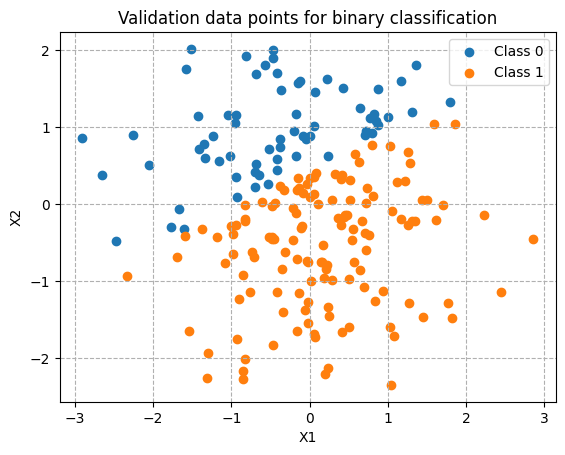

In [25]:
# Split data into training and validation sets
train_split = 0.8 # 80% of data is used for training
train_size = int(train_split * n) # Calculate the size of training set

X_train = X[:train_size]    # Training set
t_train = t[:train_size]    # Training set
X_val = X[train_size:]      # Validation set
t_val = t[train_size:]      # Validation set

# Perform logistic regression
w = np.random.randn(d + 1, 1) # Initialise the weight vector w
learning_rate = 0.001  # Learning rate
num_iterations = 1000  # Number of iterations
w_final, loss = logistic_regression(X_train, t_train, w, learning_rate, 0, 0, num_iterations) # Perform logistic regression

# Plot validation data points with different colours for each class
y_val = X_val @ w_final[:-1] + w_final[-1] # Calculate the predicted variable y
p_val = sigmoid(y_val) # Apply the sigmoid function to y to get the probability
t_val_pred = (p_val >= 0.5).astype(int) # Generate the binary classification vector t

plt.scatter(X_val[t_val_pred.flatten() == 0, 0], X_val[t_val_pred.flatten() == 0, 1], label='Class 0') # Plot the data points for predicted class 0
plt.scatter(X_val[t_val_pred.flatten() == 1, 0], X_val[t_val_pred.flatten() == 1, 1], label='Class 1') # Plot the data points for predicted class 1
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('Validation data points for binary classification')
plt.show()

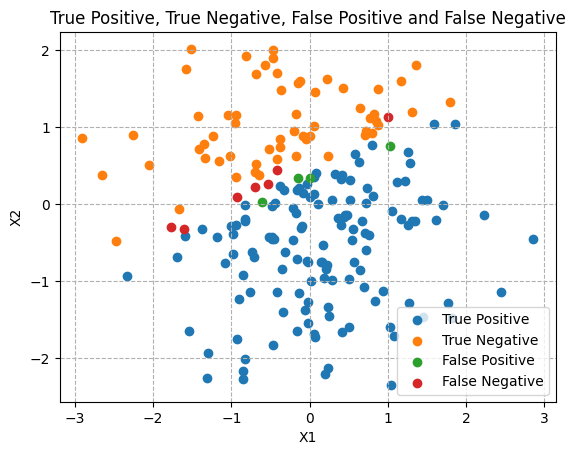

In [26]:
# Plot True Positive, True Negative, False Positive and False Negative data points
TP = np.logical_and(t_val.flatten() == 1, t_val_pred.flatten() == 1) # True Positive
TN = np.logical_and(t_val.flatten() == 0, t_val_pred.flatten() == 0) # True Negative
FP = np.logical_and(t_val.flatten() == 0, t_val_pred.flatten() == 1) # False Positive
FN = np.logical_and(t_val.flatten() == 1, t_val_pred.flatten() == 0) # False Negative

plt.scatter(X_val[TP, 0], X_val[TP, 1], label='True Positive') # Plot the data points for True Positive
plt.scatter(X_val[TN, 0], X_val[TN, 1], label='True Negative') # Plot the data points for True Negative
plt.scatter(X_val[FP, 0], X_val[FP, 1], label='False Positive') # Plot the data points for False Positive
plt.scatter(X_val[FN, 0], X_val[FN, 1], label='False Negative') # Plot the data points for False Negative
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, which="both", ls="--") # Add grid lines
plt.title('True Positive, True Negative, False Positive and False Negative')
plt.show()

In [27]:
# Print predicted weights
print('Predicted Weights:')
print(w_final)

Predicted Weights:
[[ 3.41924837]
 [-7.14238833]
 [ 3.17520276]]


#### Confusion Matrix for the validation set in the above example

In [28]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix # Reference (9)
conf_matrix = confusion_matrix(t_val, t_val_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 59   4]
 [  7 130]]


### 15. Examination impact of N and $\lambda_2$ on accuracy, F1-score, Recall

In [29]:
# For part 10 we used NRMSE as a metric for regression, we can't use it for classification
# Therefore we will use accuracy, recall, F1-score as a metric for classification

from sklearn.metrics import accuracy_score, recall_score, f1_score # Reference (10)

In [30]:
# N list for different values of n
n_values = np.logspace(2, 4, num=5, endpoint=True, base=10.0, dtype=np.int64)   

# lambda_2 list for different values of lambda_2
lambda_2_values = np.logspace(-1, 3, 5, endpoint=True, base=10.0, dtype=None)

# Initialise list for Accuracy, Recall, F1-score values for each lambda_2 versus n
accuracy_values = [[] for _ in range(len(lambda_2_values))]     # List to store accuracy values
recall_values = [[] for _ in range(len(lambda_2_values))]       # List to store recall values
f1_values = [[] for _ in range(len(lambda_2_values))]           # List to store F1-score values

for n in n_values:  # Enumerate over n values
    for i, lambda_2 in enumerate(lambda_2_values):  # Enumerate over lambda_2 values
        average_accuracy = 0    # Initialise average accuracy
        average_recall = 0      # Initialise average recall
        average_f1 = 0          # Initialise average F1-score
        for j in range(5):    
            # Generate input data matrix X of size NxD for regression and target vector t of size Nx1
            d = 10      # Number of features    
            S = np.eye(d)   # Generator matrix S
            X = generate_input_data(n, S)   # Generate the input data matrix X
            w = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]])     # True weight vector
            t = generate_binary_classification_target_vector(X, w, 0.1)     # Generate the binary classification vector t

            # Split data into training and validation sets
            train_split = 0.8                   # 80% of data is used for training
            train_size = int(train_split * n)   # Calculate the size of training set

            X_train = X[:train_size]        # Training set
            t_train = t[:train_size]        # Training set
            X_val = X[train_size:]          # Validation set
            t_val = t[train_size:]          # Validation set

            # Perform logistic regression
            # Hyperparameters
            w = np.random.randn(d + 1, 1)       # Initialise the weight vector w
            learning_rate = 0.001               # Learning rate
            num_iterations = 1000               # Number of iterations
            w, loss = logistic_regression(X_train, t_train, w, 0, lambda_2, learning_rate, num_iterations)    # Perform logistic regression

            # Find accuracy, recall, F1-score for validation set
            y_val = X_val @ w[:-1] + w[-1]  # Calculate the predicted variable y
            p_val = sigmoid(y_val)          # Apply the sigmoid function to y to get the probability
            t_val_pred = (p_val >= 0.5).astype(int)     # Generate the binary classification vector t
            accuracy = accuracy_score(t_val, t_val_pred)    # Calculate the accuracy
            recall = recall_score(t_val, t_val_pred)        # Calculate the recall
            f1 = f1_score(t_val, t_val_pred)                # Calculate the F1-score
            average_accuracy += accuracy                    # Add the accuracy to the average
            average_recall += recall                        # Add the recall to the average
            average_f1 += f1                                # Add the F1-score to the average
        # Append the average accuracy, recall, F1-score to the list
        accuracy = average_accuracy / 5         # Calculate the average accuracy
        recall = average_recall / 5             # Calculate the average recall
        f1 = average_f1 / 5                     # Calculate the average F1-score
        accuracy_values[i].append(accuracy)     # Append the accuracy to the list
        recall_values[i].append(recall)         # Append the recall to the list
        f1_values[i].append(f1)                 # Append the F1-score to the list

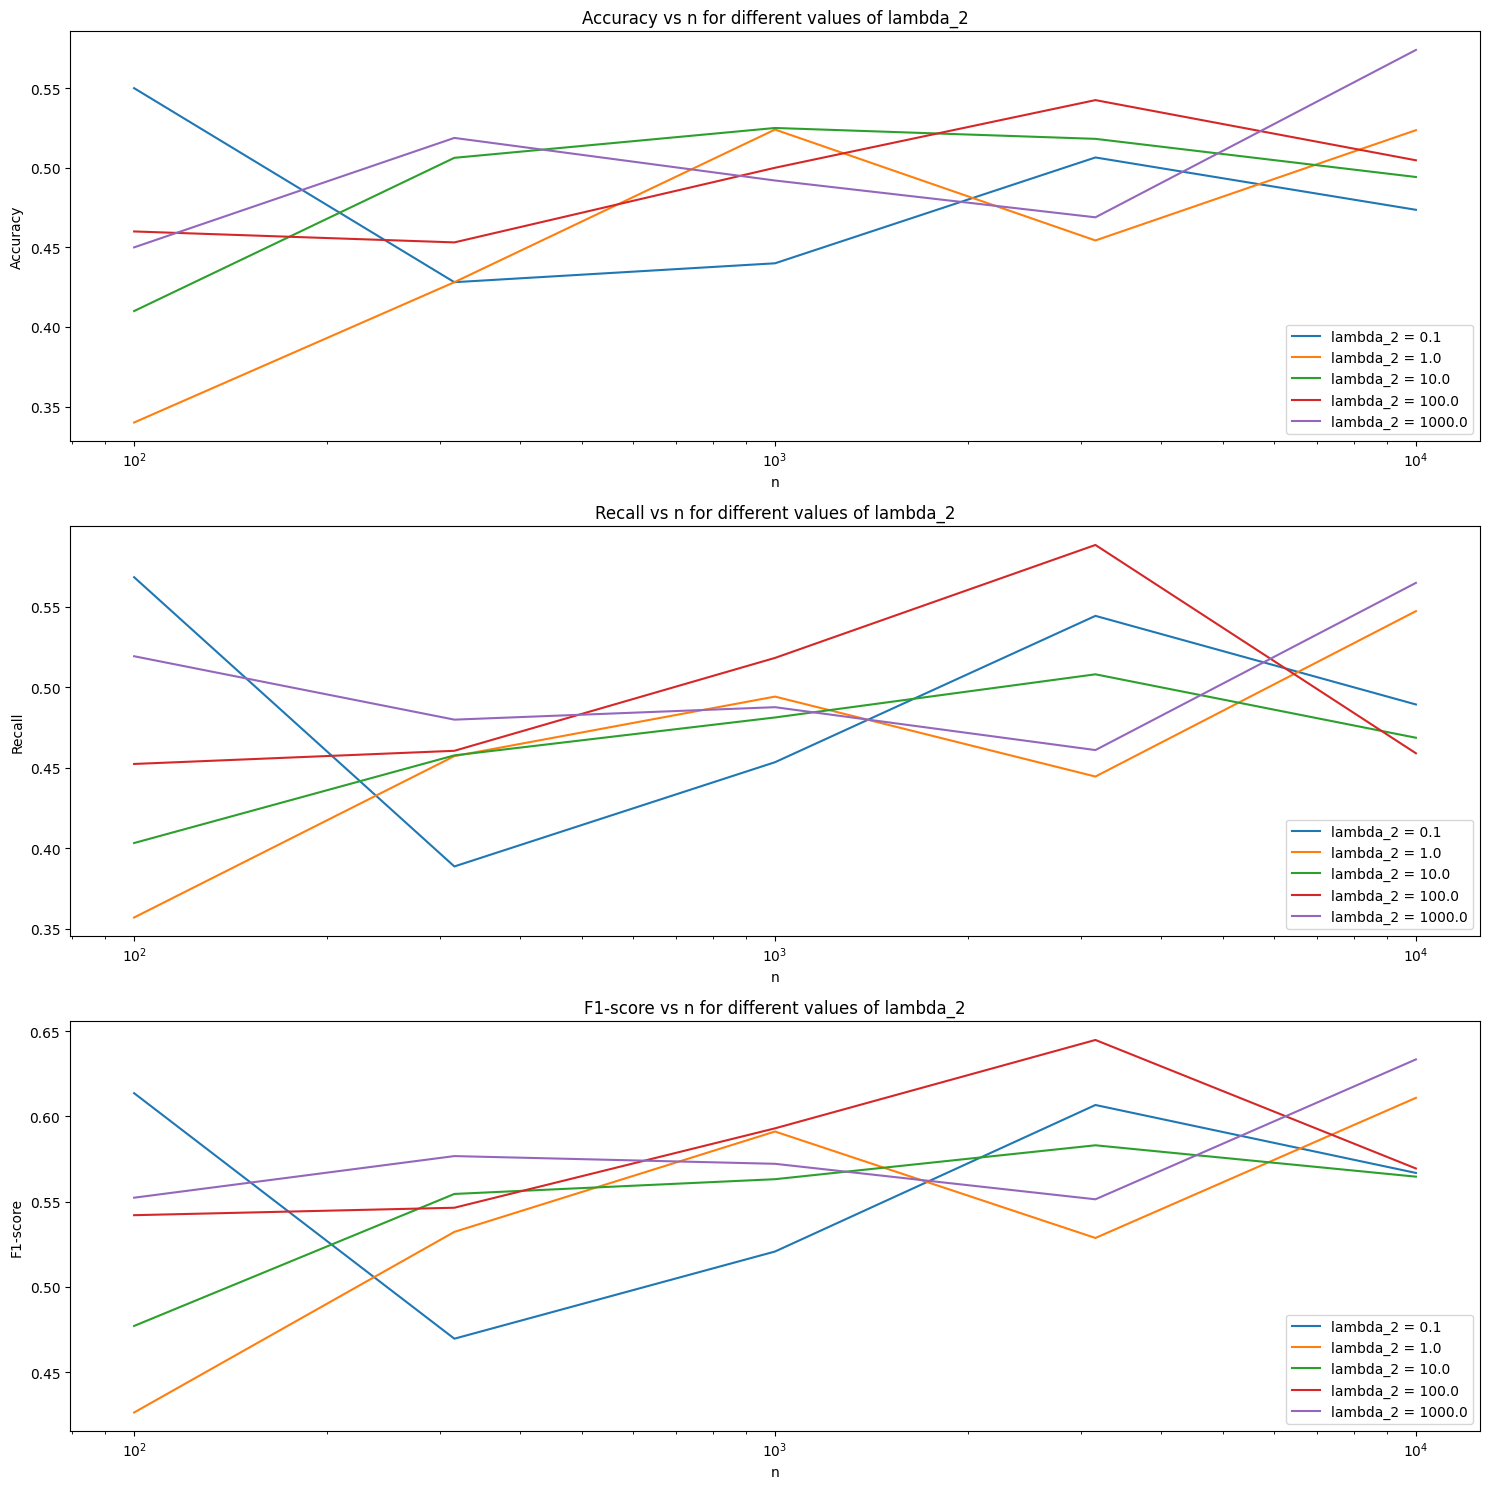

In [31]:
# Plot the graph of Accuracy, Recall, F1-score vs n for different values of lambda_2
fig, axs = plt.subplots(3)
# Change the size of the figure
fig.set_figheight(15)
fig.set_figwidth(15)
# Plot the graph of Accuracy vs n for different values of lambda_2
for i, lambda_2 in enumerate(lambda_2_values):
    axs[0].plot(n_values, accuracy_values[i], label=f'lambda_2 = {lambda_2}')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Accuracy')
axs[0].set_xscale('log')       # Set x-axis to log scale
axs[0].legend()
axs[0].set_title('Accuracy vs n for different values of lambda_2')

# Plot the graph of Recall vs n for different values of lambda_2
for i, lambda_2 in enumerate(lambda_2_values):
    axs[1].plot(n_values, recall_values[i], label=f'lambda_2 = {lambda_2}')
axs[1].set_xlabel('n')
axs[1].set_ylabel('Recall')
axs[1].set_xscale('log')        # Set x-axis to log scale
axs[1].legend()
axs[1].set_title('Recall vs n for different values of lambda_2')

# Plot the graph of F1-score vs n for different values of lambda_2
for i, lambda_2 in enumerate(lambda_2_values):
    axs[2].plot(n_values, f1_values[i], label=f'lambda_2 = {lambda_2}')
axs[2].set_xlabel('n')
axs[2].set_ylabel('F1-score')
axs[2].set_xscale('log')        # Set x-axis to log scale
axs[2].legend()
axs[2].set_title('F1-score vs n for different values of lambda_2')

plt.tight_layout()
plt.show()

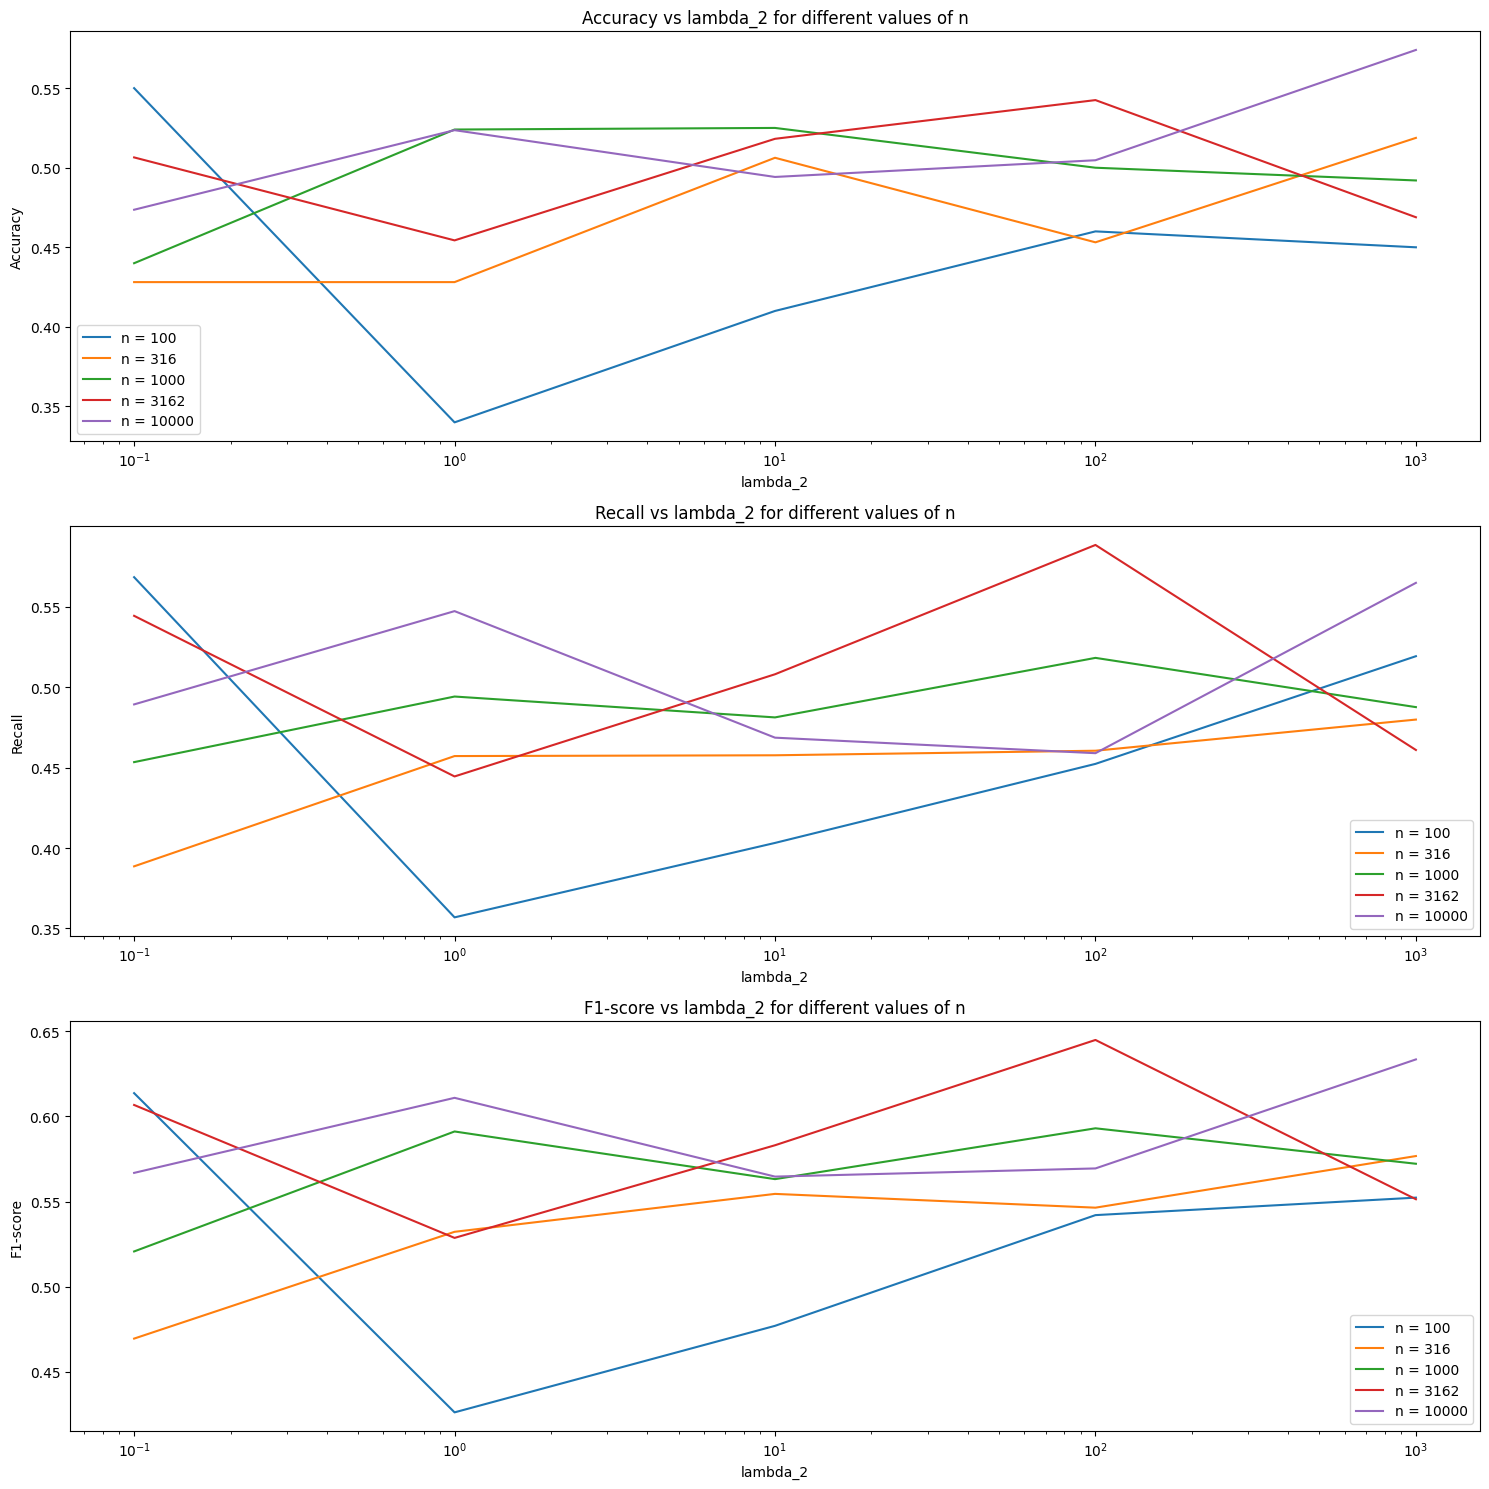

In [32]:
# Plot the graph for Accuracy, Recall, F1-score vs lambda_2 for different values of n
fig, axs = plt.subplots(3)
# Change the size of the figure
fig.set_figheight(15)
fig.set_figwidth(15)

# Take the transpose of accuracy_values, recall_values, f1_values to get the correct shape
accuracy_values_T = np.array(accuracy_values).T
recall_values_T = np.array(recall_values).T
f1_values_T = np.array(f1_values).T

# Plot the graph of Accuracy vs lambda_2 for different values of n
for i, n in enumerate(n_values):
    axs[0].plot(lambda_2_values, accuracy_values_T[i], label=f'n = {n}')
axs[0].set_xlabel('lambda_2')
axs[0].set_ylabel('Accuracy')
axs[0].set_xscale('log')        # Set x-axis to log scale
axs[0].legend()
axs[0].set_title('Accuracy vs lambda_2 for different values of n')

# Plot the graph of Recall vs lambda_2 for different values of n
for i, n in enumerate(n_values):
    axs[1].plot(lambda_2_values, recall_values_T[i], label=f'n = {n}')
axs[1].set_xlabel('lambda_2')
axs[1].set_ylabel('Recall')
axs[1].set_xscale('log')        # Set x-axis to log scale
axs[1].legend()
axs[1].set_title('Recall vs lambda_2 for different values of n')

# Plot the graph of F1-score vs lambda_2 for different values of n
for i, n in enumerate(n_values):
    axs[2].plot(lambda_2_values, f1_values_T[i], label=f'n = {n}')
axs[2].set_xlabel('lambda_2')
axs[2].set_ylabel('F1-score')
axs[2].set_xscale('log')        # Set x-axis to log scale
axs[2].legend()
axs[2].set_title('F1-score vs lambda_2 for different values of n')

plt.tight_layout()
plt.show()

As we can see from the graphs, as n increases, all parameters tend to have a higher value for the same $\lambda_2$ value which is expected. If $\lambda_2$ increases, the variance decreases leading to lesser overfitting leading to increase in accuracy and other scores.

### References:
1. ChatGPT: Add a column of ones to a np array
2. ChatGPT: Psuedo inverse of np array
3. ChatGPT: Log equivalent of linspace
4. ChatGPT: Calculate time taken by a function in python 
5. ChatGPT: NRMSE for ML
6. ChatGPT: Subplots on plt
7. ChatGPT: 2D empty list in python
8. ChatGPT: Plot correlation of columns for a dataframe
9. ChatGPT: Confusion Matrix for binary classification
10. Scikit-Learn Documentation